In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

blood_data = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')
# motor_data = pd.read_csv('/Users/larsheijnen/Thesis/data/motor/MDS-UPDRS_Part_III_21Mar2025.csv')

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_14095/595222884.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  blood_data = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')


In [3]:
# Group the blood_data by PATNO to count the number of visits per patient
patient_visits = blood_data.groupby('PATNO').size()

# Filter the patients that have visited more than once
multiple_visits = patient_visits[patient_visits > 1]

# Display the patients with multiple visits
print("Patients with multiple visits:")
print(multiple_visits)

Patients with multiple visits:
PATNO
3000      478
3001      749
3002      674
3003      660
3004      661
         ... 
211597     60
213954     38
224282     38
233667     41
243457      2
Length: 1697, dtype: int64


,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3400,Female,PD,SC,DNA,ApoE Genotype,e3/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
5230,3400,Female,PD,BL,miRNA,ZNF746,341,counts,2013-06-25,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5228,3400,Female,PD,BL,miRNA,SRCAP,259,counts,2013-06-25,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5227,3400,Female,PD,BL,miRNA,SNCA-E4E6,1439,counts,2013-06-25,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5226,3400,Female,PD,BL,miRNA,SNCA-E3E4,5539,counts,2013-06-25,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479128,3400,Female,PD,V12,Cerebrospinal Fluid,pS65 Ubiquitin,7.66,stdev,2023-05-25,240,Nicholas Hertz,Mitokinin,2023-06-27 09:00:20.0
481525,3400,Female,PD,BL,Cerebrospinal Fluid,pS65 Ubiquitin,3.19,stdev,2023-05-25,240,Nicholas Hertz,Mitokinin,2023-06-27 09:00:20.0
481526,3400,Female,PD,BL,Cerebrospinal Fluid,pS65 Ubiquitin,84.103,average (fM),2023-05-25,240,Nicholas Hertz,Mitokinin,2023-06-27 09:00:20.0
466745,3400,Female,PD,V12,Cerebrospinal Fluid,Progranulin,1.869,ng/mL,2024-01-23,215,Sarah Huntwork-Rodriguez,Denali,2024-09-12 12:02:43.0


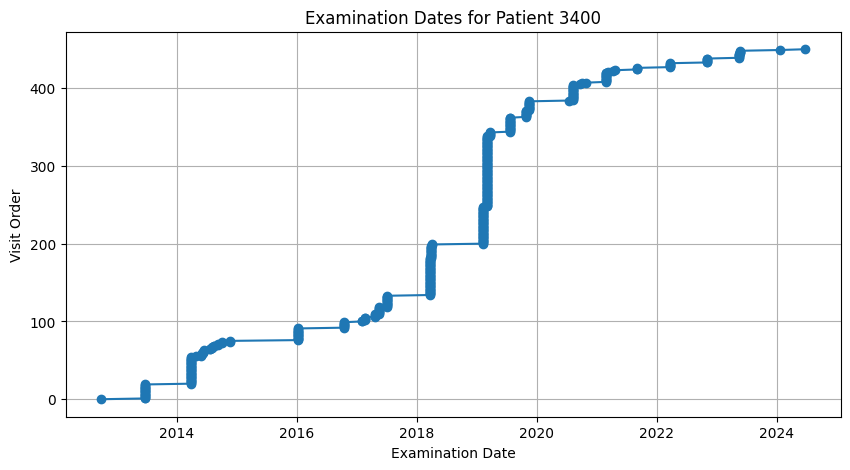

In [4]:
# Set the patient ID of interest
patient_id = 3400

# Filter for the specific patient
patient_records = blood_data[blood_data['PATNO'] == patient_id].copy()

# Convert RUNDATE to datetime format
patient_records['RUNDATE'] = pd.to_datetime(patient_records['RUNDATE'], errors='coerce')

# Sort records by examination date
patient_records.sort_values('RUNDATE', inplace=True)

# Display table of the patient's records
display(patient_records)

# Plot the examination dates
plt.figure(figsize=(10, 5))
plt.plot(patient_records['RUNDATE'], range(len(patient_records)), marker='o', linestyle='-')
plt.title(f"Examination Dates for Patient {patient_id}")
plt.xlabel("Examination Date")
plt.ylabel("Visit Order")
plt.grid(True)
plt.show()

In [ ]:
# First, let's explore the blood dataset structure
print(f"Blood data shape: {data.shape}")
print(f"Blood data columns: {data.columns.tolist()[:10]}...") # Showing first 10 columns
print(f"Number of unique patients in blood data: {data['PATNO'].nunique() if 'PATNO' in data.columns else 'PATNO column not found'}")


Blood data shape: (955272, 13)
Blood data columns: ['PATNO', 'SEX', 'COHORT', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID']...
Number of unique patients in blood data: 1766


Motor data shape: (32346, 63)
Motor data columns: ['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PDTRTMNT', 'PDSTATE', 'HRPOSTMED', 'HRDBSON', 'HRDBSOFF']...
Number of unique patients in motor data: 4313
